# Plotting and Wind Speed and Direction

In this tutorial, we will use the *matplotlib.pyplot.quiver* function to overlay wind vectors on top of relative humidity (RH). The data used are from a Global Climate Model (GCM) produced under the ssp2-4.5 scenario. Note that it is usually convinient to process the data using either CDO or NCO before using them in Python. This is because the data operators are built for the task of processing multiple datasets.

**Download the data using the following Google Drive link:** https://drive.google.com/drive/u/0/folders/1_y-rKy3KM-Rmhs9Bm8Aa_v1g9yipWI97

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np      ## Numerical Python library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  ## The crs module defines Coordinate Reference Systems and the transformations
#  between them
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER ## used to determine draw time behaviour of the gridlines and labels
import cartopy.feature as cfeat

C:\Users\misia\anaconda3\envs\cartopy_env\Lib\site-packages\pyproj\__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [14]:
## Read the files: precipitation, u-wind and v-wind components

path = '../../netcdf_data/'
rhrh = xr.open_dataset(path + 'b.BWSSP245cmip6.CMIP6-SSP2-4.5-WACCM.006_mon_3.RHREFHT.nc')
uwnd = xr.open_dataset(path + 'b.BWSSP245cmip6.CMIP6-SSP2-4.5-WACCM.006_mon_3.U850.nc')
vwnd = xr.open_dataset(path + 'b.BWSSP245cmip6.CMIP6-SSP2-4.5-WACCM.006_mon_3.v850.nc')

In [24]:
## Compare the dimensions of the three datasets

print(rhrh.dims, uwnd.dims, vwnd.dims)

In [25]:
## Subsettting the data to a region and climatology period of of interest

ds_rh = rhrh.sel(lat=slice(-10.0, 15.0), lon=slice(21.0, 52.0), 
                 time=slice('2021-01-16', '2050-01-16')) 
ds_uw = uwnd.sel(lat=slice(-10.0, 15.0), lon=slice(21.0, 52.0), 
                 time=slice('2021-01-16', '2050-01-16')) 
ds_vw = vwnd.sel(lat=slice(-10.0, 15.0), lon=slice(21.0, 52.0), 
                 time=slice('2021-01-16', '2050-01-16')) 

In [27]:
## Let's group our data according to custom seasons in xarray

rh_seas = ds_rh.groupby('time.season')#;rh_seas      ## Group data according to seasons
uw_seas = ds_uw.groupby('time.season')
vw_seas = ds_vw.groupby('time.season')

In [28]:
## Calculate the climatology of the seasons

rh_clim = rh_seas['MAM'].mean('time')#;rh_clim    ## Calculate the climatology mean for MAM sea
uw_clim = uw_seas['MAM'].mean('time')
vw_clim = vw_seas['MAM'].mean('time')

## Plotting the Data

Matplotlib contains a convinient function called quiver for plotting wind speed and direction. We will see how this is applied.
<img src="./arrows2.png" width=400 height=900 />

In [33]:
## We need to create a meshgrid using Numpy for the wind data

lon = uw_clim.lon
lat = uw_clim.lat
X, Y = np.meshgrid(lon, lat)

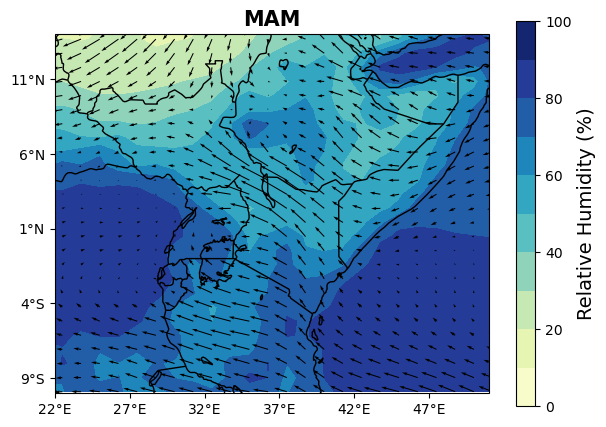

In [53]:
## Define plot area and projection

fig = plt.figure(figsize=(7, 5))
proj = ccrs.PlateCarree(central_longitude=0)
ax = plt.subplot(111, projection=proj)

## Add features to the plot area
ax.add_feature(cfeat.BORDERS, linestyle='solid', linewidth=1.)
ax.add_feature(cfeat.LAKES,facecolor='none', edgecolor='black', linewidth=1)
ax.add_feature(cfeat.COASTLINE, linewidth=1.)

## Plot the relative humidity data
cs = plt.contourf(rh_clim.lon, rh_clim.lat, rh_clim.RHREFHT, levels=np.arange(0, 101, 10), 
                  cmap=plt.cm.YlGnBu)    ## to reverse the colorbar use .reversed()

## Plot the wind data
plt.quiver(X, Y, uw_clim.U850, vw_clim.V850, scale_units = 'x', scale = 5.)

## Add more details
ax.set_extent([22, 51, -10, 14])      ## Set extent of our data
ax.set_xticks(np.arange(22, 51, 5))   ## Set the x-ticks marks at certain intervals (accepts integers only)
ax.set_yticks(np.arange(-9, 15, 5))   ## Set the y-ticks marks at certain intervals (accepts integers only)

## Format the axes
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
labelsx = ax.get_xticklabels()
labelsy = ax.get_yticklabels()
plt.setp(labelsx, fontsize=10)
plt.setp(labelsy, fontsize=10)
ax.label_outer()                 ## Automatically switch off the axis labels for multipanel plots

## Add title
plt.title('MAM', fontsize=15, fontweight="bold")

## Add colorbar

plt.colorbar(cs, orientation='vertical').set_label('Relative Humidity (%)', fontsize=14)

## Add lebels to each of our multipanel plots
# ax.text(0.9, 0.90, '(a)', fontsize = 12, horizontalalignment='center',
#         verticalalignment='center', rotation='horizontal', transform=ax.transAxes)

### Practice Exercise

1. Repeat the same and plot all seasons as multipanels
2. How can we harness the power of loop for the above procedure?
3. Plot the future changes in wind and rh between two periods (i.e., 2016-2035 and 2036-2065)